In [0]:
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.backend import stack
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [0]:
(train_data, train_label) , (test_data, test_label) = imdb.load_data(num_words=10000)

In [0]:
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    for j in range(len(sequences[i])):
      results[i][sequences[i][j]] = 1
  return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [0]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [0]:
x_partial_train = x_train[15000:]
x_val = x_train[:15000]

y_partial_train = y_train[15000:]
y_val = y_train[:15000]

# On optimise les hyper-paramètres (couches, fonctions d'activation, optimizer, nb_epochs, batch) en mesurant sur le set de validation.
# Le jeu de test est conservé pour le test final du modèle customisé.

In [116]:
model = Sequential()
model.add(Dense(16, activation='relu',input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.1)

model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
history = model.fit(x_partial_train, y_partial_train, validation_data =(x_val, y_val),verbose =1, batch_size = 8, epochs = 2)

ValueError: ignored

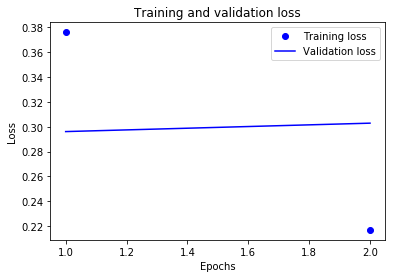

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

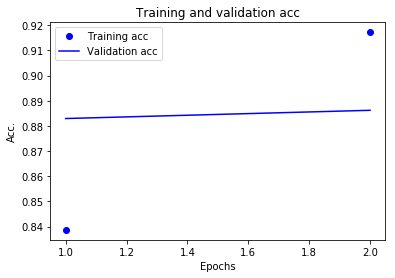

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc.')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 84us/step


[0.3129783975553513, 0.879]

In [0]:
metrics

[0.3139084875249863, 0.87512]